# *Very* brief python scienctific computing tutorial for experienced scientists
      
*Jody Klymak*

# Goals

- quick introduction, not comprehensive
- assume you know Matlab
- get you to the point where you could stay ahead of a second year class and not lead them too far astray

## Outline
- on the left ;-), but mostly just some super-simple examples
- feel free to interupt (I'll monitor the hands-up, but if I don't feel free to unmute).
- I don't _think_ this will take 3 hrs, so welcome to workshop on some of your data at the end.

--------------

# Computing Environment

- Python is "interpreted" versus "compiled"
- interpreter steps through command by command and executes.
- can execute from a command line (Read-Eval-Print-Loop: REPL) or can run a script (which just runs all the lines in the script until done or error)

## Run the `python` REPL:

- Go back to the "home" of your notebook
- Click "New:Terminal" (you can also do this from your computer's terminal)
- type `python` from the prompt, and you should get a new prompt `>>>`
- on the new prompt, type `print('Hello World\n\n')` and "Hello World" should echo, with a couple of carriage returns. 
- exit the REPL by typing `quit()`; you should be back on the command prompt of your operating system. 

## ipython REPL

The basic REPL is OK, but somewhat low-feature.  Folks usually use `ipython`, and it is what the Jupyter notebooks is based on, so lets quickly check that.  
- Go to your temrinal and type `ipython`
- `print('Hello World from ipython\n\n')`

Note that this has syntax highlighting, and it has other advantages like searching for previous commands, etc that we need not concern ourselves with here.   You can close your command window now (if you like)   

-----------------

## Jupyter Notebooks

We will do most of our examples today in jupyter notebooks, except when we make scripts.  A notebook simply runs the code you input into cells and prints the results below the cell.  Lets try that here:
- Hit the "+" icon above; it will create a new notebook "cell"
- type on one line `print('Hello 1')` and on the second line `print('Hello 2')`
- hit the "Run" icon above, (or hit "shift-enter" as a shortcut)  "Hello 1" followed by "Hello 2" should be printed below the input cell
- Select the cell by clicking and edit the strings and re-run the cell.  Your new output should be reflected

### Comment (Markdown) cells

Note that this tutorial is written in a notebooks.  If you create a new cell ("+" icon) and change the pulldown that says "Code" to say "Markdown", you can write notes in [Markdown](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).  These comments are one of the main advantages of notebooks (and you can use them in lots of other languages too, including Matlab!)

- Hit the "+" icon to create a new cell, and then change the "Code" pulldown to "Markdown"
- Type some text, maybe include a heading (`## This is a heading`) and then hit `shift-enter` (or hit "Run" icon) to execute
- Note that you can click on the cell again to edit it at any time, and then re-execute

# Motivating Example A:

Lets jump in the deep end and plot a synthetic time series of a sine wave over a couple of periods.  We will then deconstruct this, both here and over the next few lessons

$$ x = A \sin\left( \omega t \right) $$

- execute the code below
- kind of chunky?  Try and parse where you can increase the resolution...
- change the amplitude to 6 instead of 5. 
- add a title

<IPython.core.display.Javascript object>


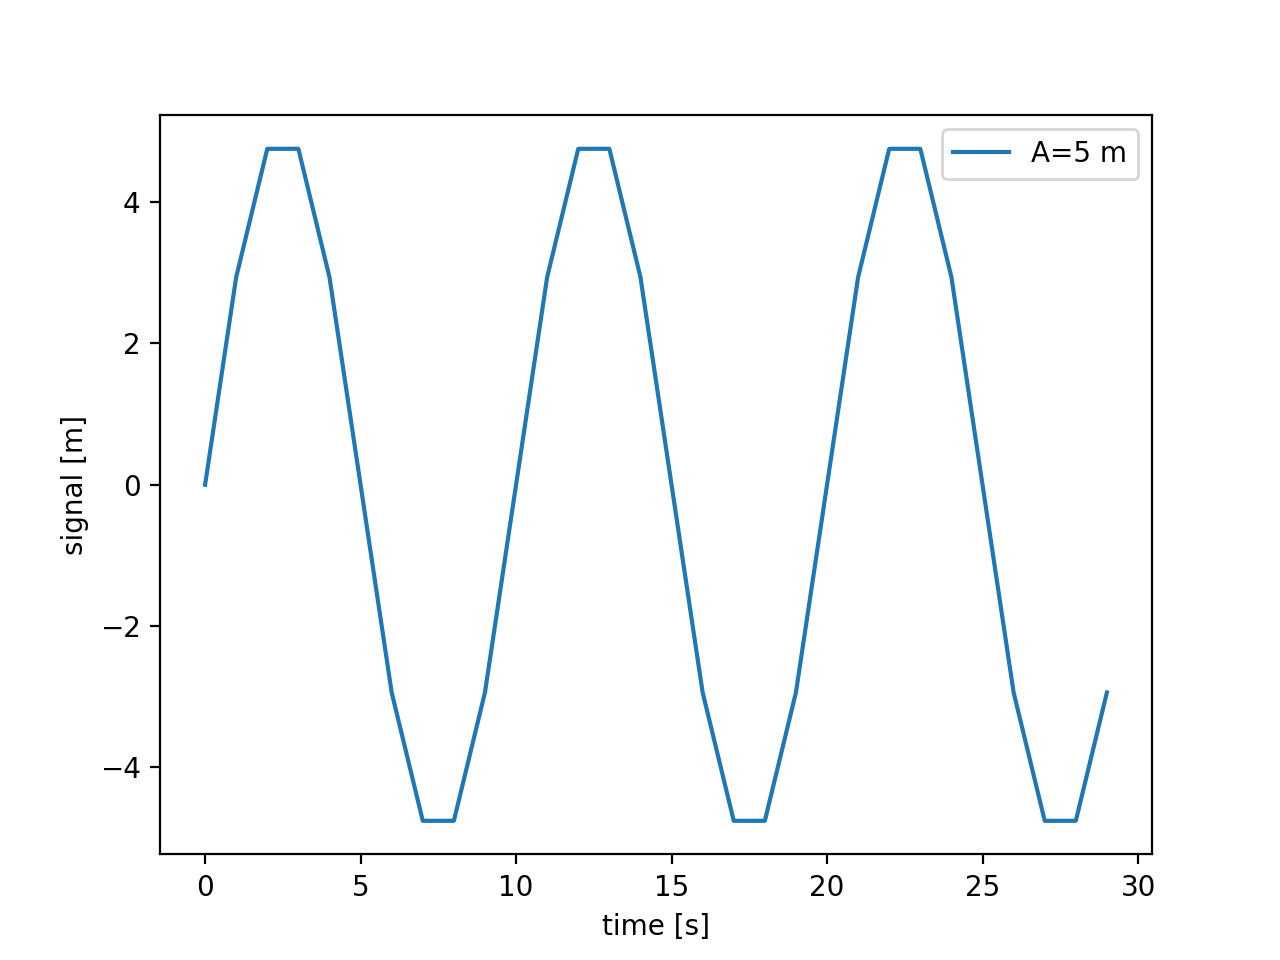

In [11]:
# import some libraries
import numpy as np
import matplotlib.pyplot as plt 
# ipython "magic" to use an interactive backend.
%matplotlib notebook 

# some constants
A = 5  # meters
T = 10  # s
om = np.pi * 2 / T  # rad/s

# make an array of time:
t = np.arange(0, 3*T, T/10)

# make the signal:
x = A * np.sin(om * t)

# plot
fig, ax = plt.subplots()
ax.plot(t, x, label=f'A={A} m')

# label:
ax.set_xlabel('time [s]')
ax.set_ylabel('signal [m]')
ax.legend()


## Libraries in python

Python has core functionality, and many of the operators you would find in any language, but there are also very powerful libraries that make up the scientific python stack.  Libraries in python must be explicitly imported, versus Matlab where they simply need to be in a path somewhere.  Explicitly importing is a bit of extra bolierplate at the top of most notebooks or scripts, but it has the advantage of being explicit and avoiding namespace conflicts.  Consider if you made a function `mean.m` in Matlab how bad that would be.

Above we have imported two libraries, [NumPy](https://numpy.org) and [Matplotlib](https://matplotlib.org).  Numpy provides multidimensional arrays (like `t` and `x` above), and operations on them (like `np.sin` above) and some constants (like `np.pi` above).  Matplotlib provides plotting functionality.  

The `import numpy as np` is convention.  We could have also done `import numpy as foobar` and then we would have `foobar.sin` instead of `np.sin`.  But NumPy is extremely fundamental to scientific computing, and almost everyon calls in `np`, so... Similarly with `import matplotlib.pyplot as plt` as a way to get at the plotting interface.

## ipython magics

If you had _not_ used this magic, `%matplotlib notebook`, the plot would still have shown, but it wouldn't have the zoom and pan controls (go ahead and try them). There are many other magics, but that is the only one I've ever used, so I won't explore them here

## Making some data: `np.arange`

`np.arange` is similar to `t = 0:T/10:3*T` in matplotlib.  Note the difference of order, and that you don't need to specify all the arguments.  Note that the values chosen are strictly less than the second argument, and that if no first argument is specified, the array starts at zero.  

In [6]:
print(np.arange(5))
print(np.arange(1, 5))
print(np.arange(1, 5, 0.4))

[0 1 2 3 4]
[1 2 3 4]
[1.  1.4 1.8 2.2 2.6 3.  3.4 3.8 4.2 4.6]


## Plotting

The plotting should be familiar-ish, as its heavily based on Matlab.  The Matplotlib plotting interface is very object-oriented.  There is a state-based more Matlab-ish interface as well, which is a bit less typing, but in the end is stifling, so strongly suggest you get used to the object-oriented interface.

`fig, ax = plt.subplots()` makes a figure object (`fig`) and an axes object (`ax`).  The `ax` object has _many_ methods attached to it that we then can call, as shown in the example.  There are things we can do with the `fig` object as well, but weren't needed above.  

# Motivating example B

Now lets plot four frequencies.  We can brute force this, or we can use a for-loop.  Note that we don't need to re-import any libraries we have already imported.  Note that we don't need to redefine `t` or `A` (unless we want to).

At the same time that we make the plot, lets save the time series in an array.  Like in Matlab, its a good idea to pre-allocate your array which in this case will be 4 x the length of the time vector. 

<IPython.core.display.Javascript object>


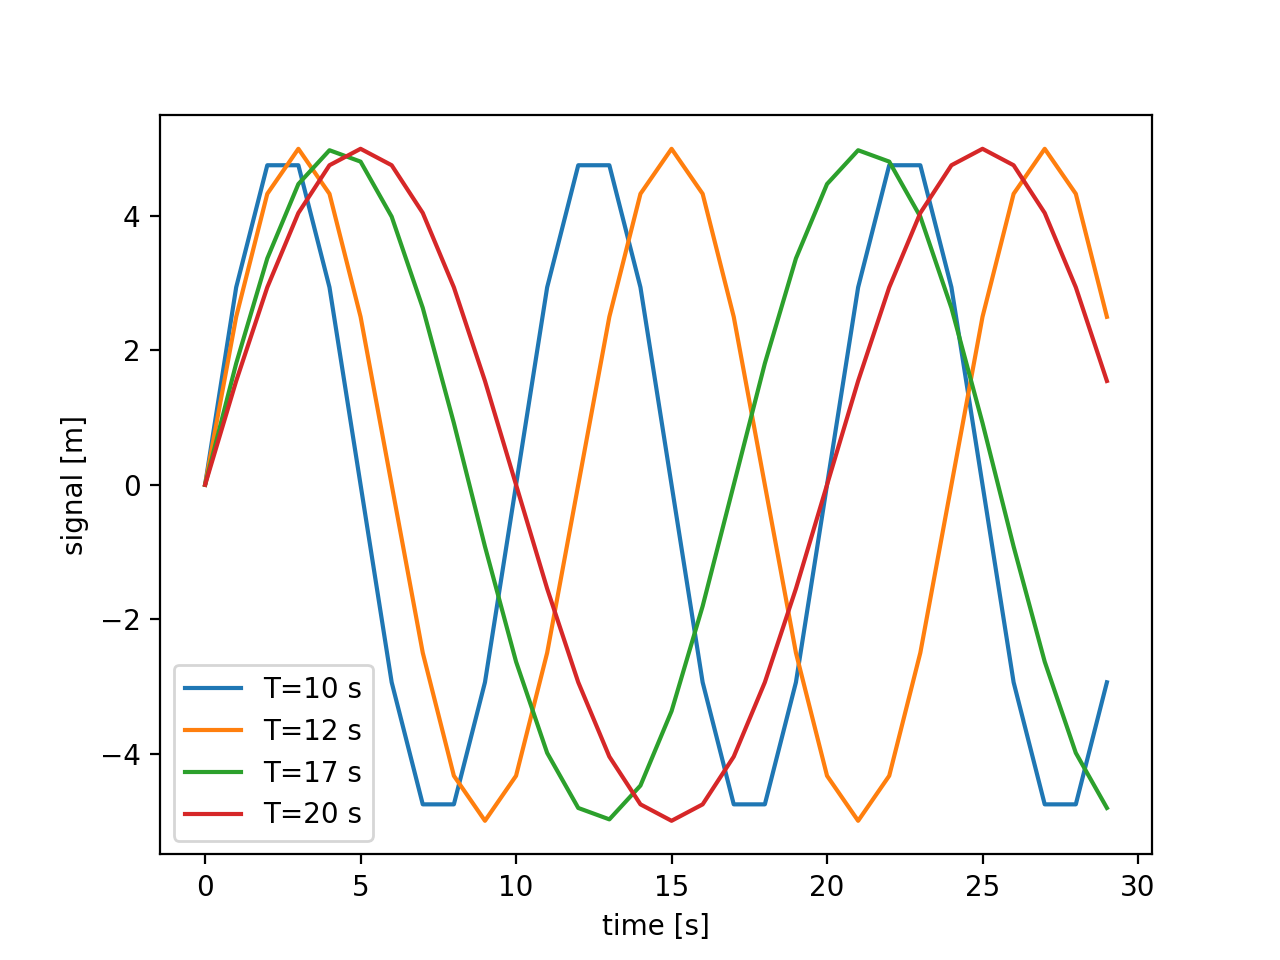

[[ 0.00000000e+00  2.93892626e+00  4.75528258e+00  4.75528258e+00
   2.93892626e+00  6.12323400e-16 -2.93892626e+00 -4.75528258e+00
  -4.75528258e+00 -2.93892626e+00 -1.22464680e-15  2.93892626e+00
   4.75528258e+00  4.75528258e+00  2.93892626e+00  1.83697020e-15
  -2.93892626e+00 -4.75528258e+00 -4.75528258e+00 -2.93892626e+00
  -2.44929360e-15  2.93892626e+00  4.75528258e+00  4.75528258e+00
   2.93892626e+00  3.06161700e-15 -2.93892626e+00 -4.75528258e+00
  -4.75528258e+00 -2.93892626e+00]
 [ 0.00000000e+00  2.50000000e+00  4.33012702e+00  5.00000000e+00
   4.33012702e+00  2.50000000e+00  6.12323400e-16 -2.50000000e+00
  -4.33012702e+00 -5.00000000e+00 -4.33012702e+00 -2.50000000e+00
  -1.22464680e-15  2.50000000e+00  4.33012702e+00  5.00000000e+00
   4.33012702e+00  2.50000000e+00  1.83697020e-15 -2.50000000e+00
  -4.33012702e+00 -5.00000000e+00 -4.33012702e+00 -2.50000000e+00
  -2.44929360e-15  2.50000000e+00  4.33012702e+00  5.00000000e+00
   4.33012702e+00  2.50000000e+00]
 [ 0.0

In [12]:
# instantiate the figure at the start, otherwise we get 4 figures!
fig, ax = plt.subplots()

xsave = np.full((4, len(t)), np.NaN)  # make an array of NaN...

count = 0
for T in [10, 12, 17, 20]:  # s
    om = np.pi * 2 / T  # rad/s

    # make the signal:
    x = A * np.sin(om * t)
    # save the signal:
    xsave[count, :] = x
    # plot
    ax.plot(t, x, label=f'T={T} s')
    # increment the count...
    count += 1

# label outside the loop since it only needs to happen once...
ax.set_xlabel('time [s]')
ax.set_ylabel('signal [m]')
ax.legend()
print(xsave)

## for-loop and iterables

The for-loop above iterates over a basic python `list` of four (floating point) numbers.  The variable `T` is assigned to each value in the list and the indented code is executed.  Note the indentation is the only way python recognizes scope of the for-loop!  There are no opening of closing phrase or brackets.  This can seem dumb at first, but actually forces your code to be properly indented, and in the end makes it more readable.  

There are other "iterables" in python.  A numpy array is a very useful example; so in the above we could have done the following:  Note that I've also printed the "type" of the python variables, which can be useful when we are confused!

In [15]:
Tvalues = np.array([10, 12, 17, 20])
for T in Tvalues:
    print(T, type(T))

Tvalues = [10, 12, 17, 20]
for T in Tvalues:
    print(T, type(T))

    

10 <class 'numpy.int64'>
12 <class 'numpy.int64'>
17 <class 'numpy.int64'>
20 <class 'numpy.int64'>
10 <class 'int'>
12 <class 'int'>
17 <class 'int'>
20 <class 'int'>


Note that above we also needed a `count` variable.  This happens _all_ the time in programming, so python has a useful helper called `enumerate`:

In [16]:
for count, T in enumerate(Tvalues):
    print(f'the count: {count}, the value {T}, the type: {type(T)}')

the count: 0, the value 10, the type: <class 'int'>
the count: 1, the value 12, the type: <class 'int'>
the count: 2, the value 17, the type: <class 'int'>
the count: 3, the value 20, the type: <class 'int'>


Another useful for-loop trick is if you have two (or more) iterables of the same size you can use `zip` to unpack them:

In [21]:
Svalues = np.array(Tvalues) * 2  
for T, S in zip(Tvalues, Svalues):
    print(f'T {T}, S {S}')

T 10, S 20
T 12, S 24
T 17, S 34
T 20, S 40


There is a special iterable called `range`:

In [7]:
# note, starts at 0!
for a in range(8):
    print(a, end='')

01234567

In [9]:
for a in range(1, 8):
    print(a, end='')

1234567

In [8]:
for a in range(0, 8, 2):
    print(a, end='')

0246

### lists
Note there is a fundamental difference between a list and a 1-D array.  The 1-D numpy array is very much like a Matlab array (except it is 1-dimensional).  A list is a Python data type that behaves very differently.

First a list can have anything in it, including other lists:

In [30]:
mylist = ['boo', 54.2, Tvalues, np.array(Tvalues)]
print(mylist)
for n, x in enumerate(mylist):
    print(f'element {n}, contains: {x}, of type {type(x)}')

['boo', 54.2, [10, 12, 17, 20], array([10, 12, 17, 20])]
element 0, contains: boo, of type <class 'str'>
element 1, contains: 54.2, of type <class 'float'>
element 2, contains: [10, 12, 17, 20], of type <class 'list'>
element 3, contains: [10 12 17 20], of type <class 'numpy.ndarray'>


Lists can be indexed, and lists can be "sliced":

In [35]:
print(mylist[1])
print(mylist[slice(0,None, 2)])  # 0 means start at beginning, None means go to end, and 2 means every second element

54.2
['boo', [10, 12, 17, 20]]


In [40]:
# Note I had to make Tvalues an array above because * on a list means something different!
print('list * 2:', Tvalues * 2)
print('list * 3:', Tvalues * 3)
print((Tvalues * 3)[slice(None, None, 2)])
print((Tvalues * 3)[slice(None, None, -2)])

list * 2: [10, 12, 17, 20, 10, 12, 17, 20]
list * 3: [10, 12, 17, 20, 10, 12, 17, 20, 10, 12, 17, 20]
[10, 17, 10, 17, 10, 17]
[20, 12, 20, 12, 20, 12]


## numpy arrays

Numpy arrays are usualy best left as numbers (though they can have strings etc), and there are special numpy arrays that have datetime datatypes, and of course complex numbers.  Numpy arrays can have any dimension that we want, but they cannot be "ragged" (usually)

### 1-D arrays and indexing:

In [98]:
x = np.array([0, 4, 7.8, 9, 3.0, 2])
print(x)
print('shape', x.shape, 'len', len(x), 'size', x.size)
print(x[[1, 2]])  # address with a list of indices
print('every second, start at element 0', x[::2])  
print('every second, start at element 1:', x[1::2])  
print('every second, stop _before_ 4th:', x[:4:2])  

[0.  4.  7.8 9.  3.  2. ]
shape (6,) len 6 size 6
[4.  7.8]
every second, start at element 0 [0.  7.8 3. ]
every second, start at element 1: [4. 9. 2.]
every second, stop _before_ 4th: [0.  7.8]


### 2-d array:

Note how indexing a row or column returns a 1-D array. 

In [66]:
x = np.array([[0, 4, 7.8, 9, 3.0, 2], 
              [10, 14, 17.8, 19, 13.0, 12]])
print(x)
print('shape', x.shape, 'len', len(x), 'size', x.size)
print('first row', x[0, :], x[0, :].shape)

print('second column', x[:, 1], x[:, 1].shape)

print('every other column x[:, ::2]')
print('shape ', x[:, ::2].shape)
print(x[:, ::2])

[[ 0.   4.   7.8  9.   3.   2. ]
 [10.  14.  17.8 19.  13.  12. ]]
shape (2, 6) len 2 size 12
first row [0.  4.  7.8 9.  3.  2. ] (6,)
second column [ 4. 14.] (2,)
every other column x[:, ::2]
shape  (2, 3)
[[ 0.   7.8  3. ]
 [10.  17.8 13. ]]


### higher dimensions

You can make an array with as many dimensions as you like.

In [15]:
# Note the use of np.arange.  Its just like `range` above, but makes an array
x = np.arange(4*5*6).reshape(4, 5, 6)
print(x)
print('shape', x.shape, 'len', len(x), 'size', x.size)
# can also demo indexing....
print(x[0, :, :])

[[[  0   1   2   3   4   5]
  [  6   7   8   9  10  11]
  [ 12  13  14  15  16  17]
  [ 18  19  20  21  22  23]
  [ 24  25  26  27  28  29]]

 [[ 30  31  32  33  34  35]
  [ 36  37  38  39  40  41]
  [ 42  43  44  45  46  47]
  [ 48  49  50  51  52  53]
  [ 54  55  56  57  58  59]]

 [[ 60  61  62  63  64  65]
  [ 66  67  68  69  70  71]
  [ 72  73  74  75  76  77]
  [ 78  79  80  81  82  83]
  [ 84  85  86  87  88  89]]

 [[ 90  91  92  93  94  95]
  [ 96  97  98  99 100 101]
  [102 103 104 105 106 107]
  [108 109 110 111 112 113]
  [114 115 116 117 118 119]]]
shape (4, 5, 6) len 4 size 120
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]]


### indexing

Indexing works just like for lists:

In [23]:
x = np.arange(12)
print('x', x)
print('x[1:4]', x[1:4])

print('x[:4]', x[:4])
print('x[::2]', x[::2])
print('x[::-1]', x[::-1])
print(x[:9:3])

x [ 0  1  2  3  4  5  6  7  8  9 10 11]
x[1:4] [1 2 3]
x[:4] [0 1 2 3]
x[::2] [ 0  2  4  6  8 10]
x[::-1] [11 10  9  8  7  6  5  4  3  2  1  0]
[0 3 6]


In [27]:
x = np.arange(12).reshape(4, 3)
print(x)
x[1:3, 1:]

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


array([[4, 5],
       [7, 8]])

### Conditionally modifying arrays:

Sometimes we want to change an array dependent on the data in the array.  So in the following, suppose we want to multiply everything greater than zero by 5.  We could use a for-loop...

<IPython.core.display.Javascript object>


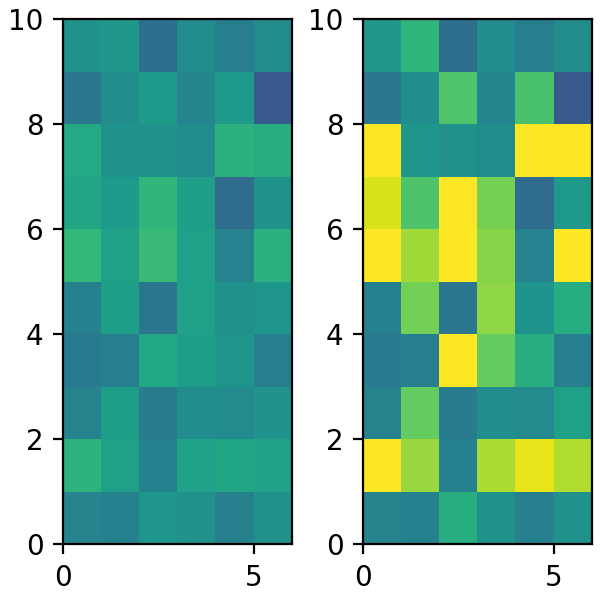

In [33]:
m = 10
n = 6
x = np.random.randn(m, n)
y = x * 1.0  # make a copy
for i in range(m):
    for j in range(n):
        if x[i, j] > 0:
            y[i, j] = 5 * x[i, j]
fig, axs = plt.subplots(1, 2, figsize=(3, 3), constrained_layout=True)
axs[0].pcolormesh(x, vmin=-6, vmax=6)
axs[1].pcolormesh(y, vmin=-6, vmax=6)

However, just like in Matlab, that will be pretty slow for a big array, and its a lot of typing compared to

<IPython.core.display.Javascript object>


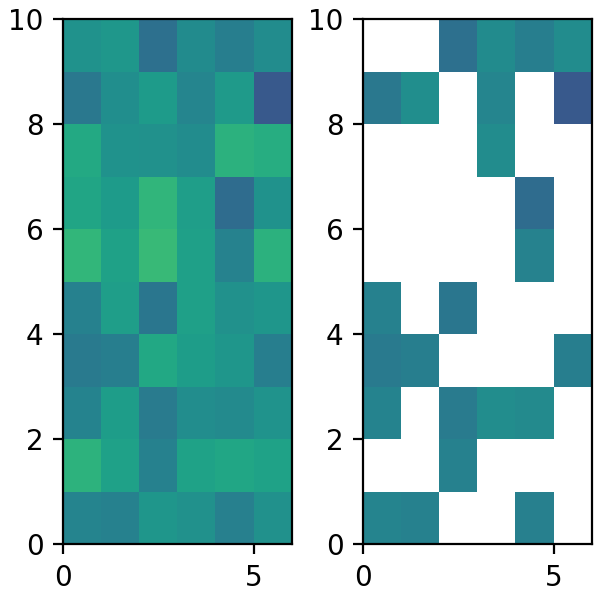

In [36]:
y = np.where(x>0, 5 * x, x)
fig, axs = plt.subplots(1, 2, figsize=(3, 3), constrained_layout=True)
axs[0].pcolormesh(x, vmin=-6, vmax=6)
axs[1].pcolormesh(y, vmin=-6, vmax=6)

Yet anoter way is to use conditional indexing:

<IPython.core.display.Javascript object>


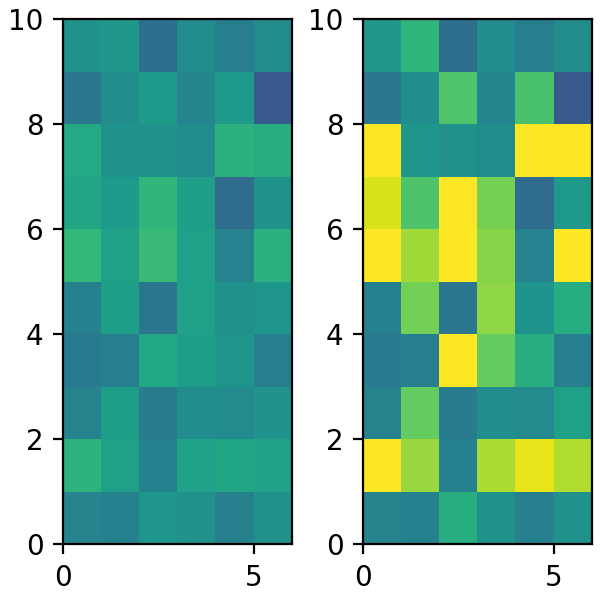

In [38]:
y = x * 1
y[x>0] = x[x>0] * 5
fig, axs = plt.subplots(1, 2, figsize=(3, 3), constrained_layout=True)
axs[0].pcolormesh(x, vmin=-6, vmax=6)
axs[1].pcolormesh(y, vmin=-6, vmax=6)

In [39]:
print(y[y>0])

[ 1.52955012  0.14062182  0.08365215  8.59545058  4.12915689  4.46086878
  5.55098762  4.58535615  3.10622667  0.79871432  5.92522777  3.12981157
  1.53503631  3.45134531  3.9428877   0.21229594  1.41756199  9.52915188
  4.27387963 10.45763365  3.82754605  8.32507214  5.31987468  2.65227621
  9.1684257   3.49704057  0.51561257  6.15167834  0.2982628   0.0179943
  8.25192779  7.48173116  2.71455499  2.57526271  0.34054536  1.81285215]


### numpy array math

Numpy arrays are very similar to Matlab arrays and many of the same concepts apply.  There are a couple of key differences

#### shape broadcasting

Matlab has no concept of this, but it is super-helpful

In [76]:
# note how 0 is added to each row of the first column, 1 to each row of the second, etc:
x = np.arange(3*4).reshape(3, 4)
y = np.arange(4) 
print(x)
print(y)
print(x+y)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2 3]
[[ 0  2  4  6]
 [ 4  6  8 10]
 [ 8 10 12 14]]


In [77]:
# however:
x = np.arange(3*4).reshape(3, 4)
y = np.ones(3)
print(x)
print(y)
print(x+y)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[1. 1. 1.]


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [79]:
# to fix this we could transpose and then transpose again:
print((x.T+y).T)

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]


In [84]:
# or we could, much more elegantly, make a new axes:
print(x + y[:, None])
print(y[:, None])

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]
[[1.]
 [1.]
 [1.]]


In [82]:
# these work for any usualy operators:
# or we could make a new axes:
print(x * y[:, None])
print(y[:, None])

[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]


#### matrix algebra and functions with numpy

matrix algebra requires explicit use of functions (`np.outer`, `np.inner`, `np.inv` etc)

In [94]:
x = np.arange(4)
y = np.arange(3)
X = np.outer(x, y)
print(X)
print(np.inner(X, y))

[[0 0 0]
 [0 1 2]
 [0 2 4]
 [0 3 6]]
[ 0  5 10 15]


In [97]:
print(X)
print(np.sum(X))
print(np.sum(X, axis=1))
print(np.sum(X, axis=0))

[[0 0 0]
 [0 1 2]
 [0 2 4]
 [0 3 6]]
18
[0 3 6 9]
[ 0  6 12]


# Other python stuff

We have seen `numpy.array` data types and python `lists`.  There are a couple of other data types that are useful to quickly review

## dictionaries

Matlab has structures, which is a great way to organize data.  The equivalent are dictionaries in Python, though they are _much_ more free form.

In [104]:
mydict = {'boo': 10.3, 'hoo': 12.2, 'Hi': 15}
print(mydict['boo'], mydict['hoo'])
for k in mydict.keys():
    print(f'key: {k}; value: {mydict[k]}')

10.3 12.2
key: boo; value: 10.3
key: hoo; value: 12.2
key: Hi; value: 15


In [111]:
# keys can be almost _any_ other object!
x = 34.5
mydict = {x: np.arange(4), 'boo': np.arange(3) * 4}
print(mydict[34.5], mydict['boo'])

[0 1 2 3] [0 4 8]


## functions, classes, and methods

Coming from Matlab, everything is either a variable or a function.  Python is more object-oriented, so it also has the concept of a `class`.  You can write your own class if you really want to, but more often that is for library writers.  For instance in the call `x = np.array([1, 2, 3])`, `np.array` is a _function_ in the numpy library.  `x` is an instance of class `ndarray`.  The class has methods on it, like `x.sum()`, though confusingly you can also call a function `np.sum(x)`:

In [45]:
print('type of np.array', type(np.array))
x = np.array([1, 2, 3])
print('type of x', type(x))
print('x.sum()', x.sum())
print('type of x.sum', type(x.sum))
print('type of np.sum', type(np.sum))
print('np.sum(x)', np.sum(x))

type of np.array <class 'builtin_function_or_method'>
type of x <class 'numpy.ndarray'>
x.sum() 6
type of x.sum <class 'builtin_function_or_method'>
type of np.sum <class 'function'>
np.sum(x) 6


We also saw examples of calling class methods when we did things like `ax.plot` above.  `ax` is an instance of _class_ SubplotAxes, and `plot` is a _method_ on that class. 

Hopefully you don't need to worry too much about these distinctions.  They make python quite powerful, but different libraries use different conventions, and it can sometimes be confusing (for me at least).

More useful, however, is that you will probably want to make standalone _functions_.  That is relatively straightforward with the only trick being the signature:

In [54]:
def my_cool_function(x, my_option=None):
    """
    print out the value of x
    
    Parameters:
    -----------
    x : object
        value to print out
    my_option : str (optional)
        optional string to print out after x

    """
    if my_option is None:
        my_option = ''
    elif not isinstance(my_option, str):
        raise ValueError('my_option must be of type string')

    print('x:', x, 'my_option:', my_option)


my_cool_function(1)

# note we can also explicitly use the variable name if we like:
my_cool_function(x=1)

my_cool_function(1, my_option='boo!')

# illegal option (you can check x as well if you want to restrict that)
my_cool_function(1, my_option=2)

x: 1 my_option: 
x: 1 my_option: 
x: 1 my_option: boo!


ValueError: my_option must be of type string

In [56]:
# see the help:
my_cool_function?

In [57]:
# see the source:
my_cool_function??

In [62]:
# functions can also return things:

def x_minus_3(x):
    return x-3

y = x_minus_3(4)
print(y)

# if you need multiple outputs just separate by commas:
def x_squared_cubed(x):
    return x**2, x**3

x2, x3 = x_squared_cubed(np.array([2, 3, 4]))
print(x2, x3)


1
[ 4  9 16] [ 8 27 64]


What is the difference between `my_cool_function(x, my_option=None)` and `my_cool_function(x, my_option)`?  By specifying `my_option=None` you make that _keyword argument_ optional, and specify its default.  If you don't specify the default, then it is a _positional argument_ and you must specify it everytime the function is called.  

In [63]:
def my_cool_function2(x, my_option):
    if my_option is None:
        my_option = ''
    elif not isinstance(my_option, str):
        raise ValueError('my_option must be of type string')

    print('x:', x, 'my_option:', my_option)

my_cool_function2(2, 'boo!')
my_cool_function2(2)

x: 2 my_option: boo!


TypeError: my_cool_function2() missing 1 required positional argument: 'my_option'

Note that if we have multiple _keyword arguments_ their calling order does not matter.  Of course the same is not true of _positional arguments_

In [66]:
def my_cool_function2(x, my_option1=None, my_option2=None):
    if my_option1 is None:
        my_option1 = ''
    elif not isinstance(my_option1, str):
        raise ValueError('my_option must be of type string')

    print('x:', x, 'my_option1:', my_option1, 'my_option2:', my_option2)

my_cool_function2(2, my_option2='option 2', my_option1='option 1')

x: 2 my_option1: option 1 my_option2: option 2


# Reading a csv file and plotting

We will read and plot csv, matlab (`*.mat`), and netcdf (`*.nc`) files in the rest of the tutorial, starting with a csv file from the Moana Loa observatory.  The data is at https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv, and is stored here as `data/moana_monthly.csv`.  We will also work on dealing with dates here, which are often a bit of a pain...

If we look at the file, we see that the first 54 lines are a header, the next three are the names of the columns, followed by the data.  We can also see that the data has bad data set by -99.99.  

To decode this, we use `np.genfromtxt`.  It is actually quite powerful, but we don't need much of the power for this data set.  

In [13]:
data = np.genfromtxt('../data/moana_monthly.csv', delimiter=',', skip_header=57)
print('shape', data.shape)
print(data)


shape (768, 10)
[[ 1.9580e+03  1.0000e+00  2.1200e+04 ... -9.9990e+01 -9.9990e+01
  -9.9990e+01]
 [ 1.9580e+03  2.0000e+00  2.1231e+04 ... -9.9990e+01 -9.9990e+01
  -9.9990e+01]
 [ 1.9580e+03  3.0000e+00  2.1259e+04 ...  3.1490e+02  3.1570e+02
   3.1443e+02]
 ...
 [ 2.0210e+03  1.0000e+01  4.4484e+04 ... -9.9990e+01 -9.9990e+01
  -9.9990e+01]
 [ 2.0210e+03  1.1000e+01  4.4515e+04 ... -9.9990e+01 -9.9990e+01
  -9.9990e+01]
 [ 2.0210e+03  1.2000e+01  4.4545e+04 ... -9.9990e+01 -9.9990e+01
  -9.9990e+01]]


In [14]:
# lets organize a bit:
moana = {'year': data[:, 0], 'month': data[:, 1], 'CO2': data[:, 4], 'CO2_adj': data[:, 5]}
print(moana.keys())

dict_keys(['year', 'month', 'CO2', 'CO2_adj'])


## dates in python

Dates are a bit confusing in python.  There is a base library `datetime` module, but it is not great for array arithmetic.  Numpy has a `np.datetime64` module, which is what I typically try to use. (https://numpy.org/doc/stable/reference/arrays.datetime.html)

Lets convert the years and dates into np.datetime64 objects; `np.datetime64` takes strings, so we need to do this as a loop:


In [35]:
# preallocate:
moana['date'] = np.full_like(moana['year'], np.nan , dtype='datetime64[ms]')

# loop through all the data:
for i in range(len(moana['year'])):
    # note we need to coerce to int and to format the month string as an 0-leading int
    moana['date'][i] = np.datetime64(f'{int(moana["year"][i])}-{int(moana["month"][i]):02d}-15')

<IPython.core.display.Javascript object>


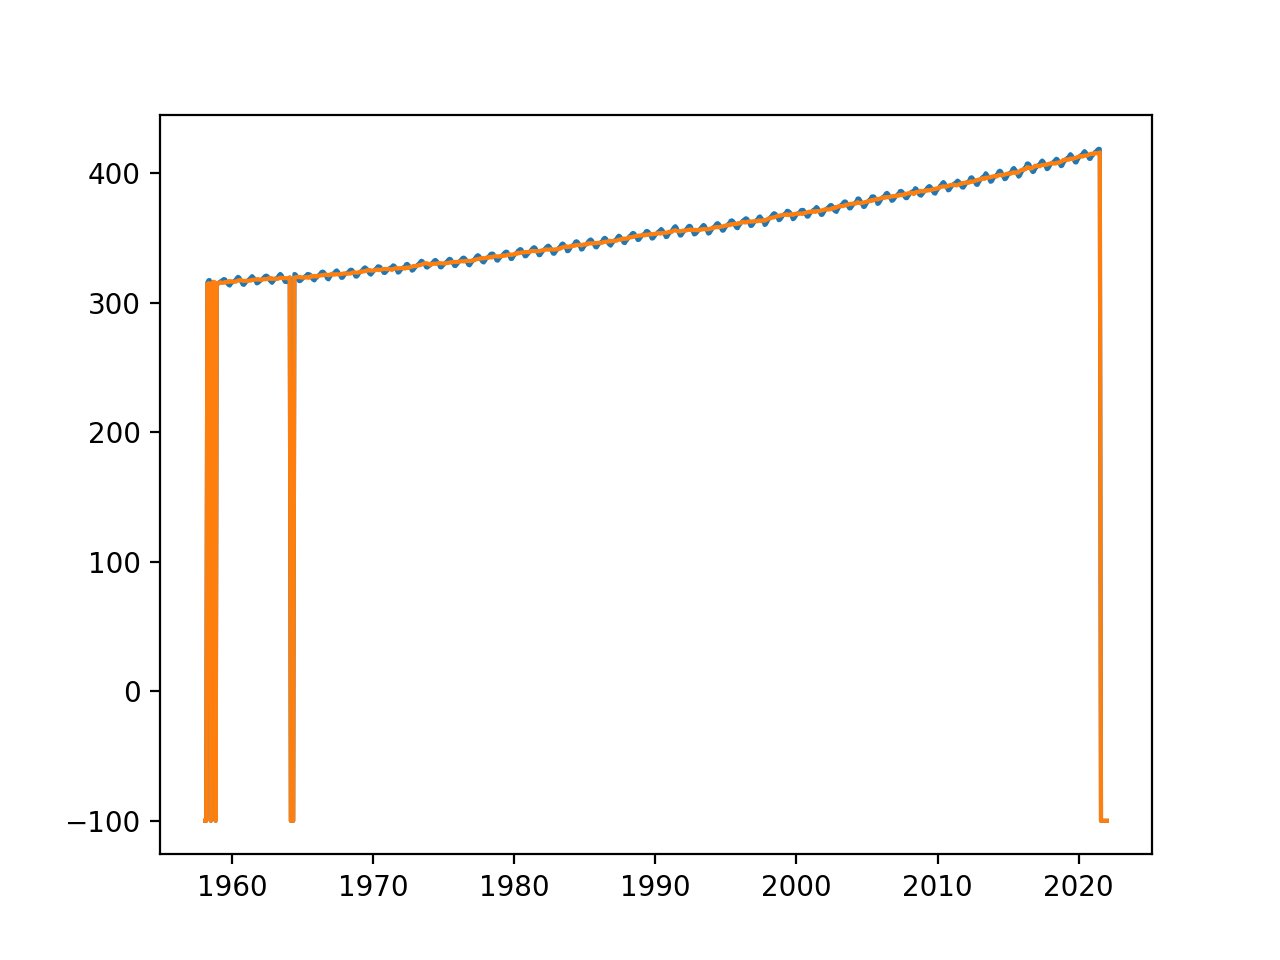

In [25]:
fig, ax = plt.subplots()
ax.plot(moana['date'], moana['CO2'])
ax.plot(moana['date'], moana['CO2_adj'])

In [142]:
# use np.where to set to NaN when less than -99
moana['CO2'] = np.where(moana['CO2']<-99, np.NaN, moana['CO2'])
moana['CO2_adj'] = np.where(moana['CO2_adj']<-99, np.NaN, moana['CO2_adj'])

<IPython.core.display.Javascript object>


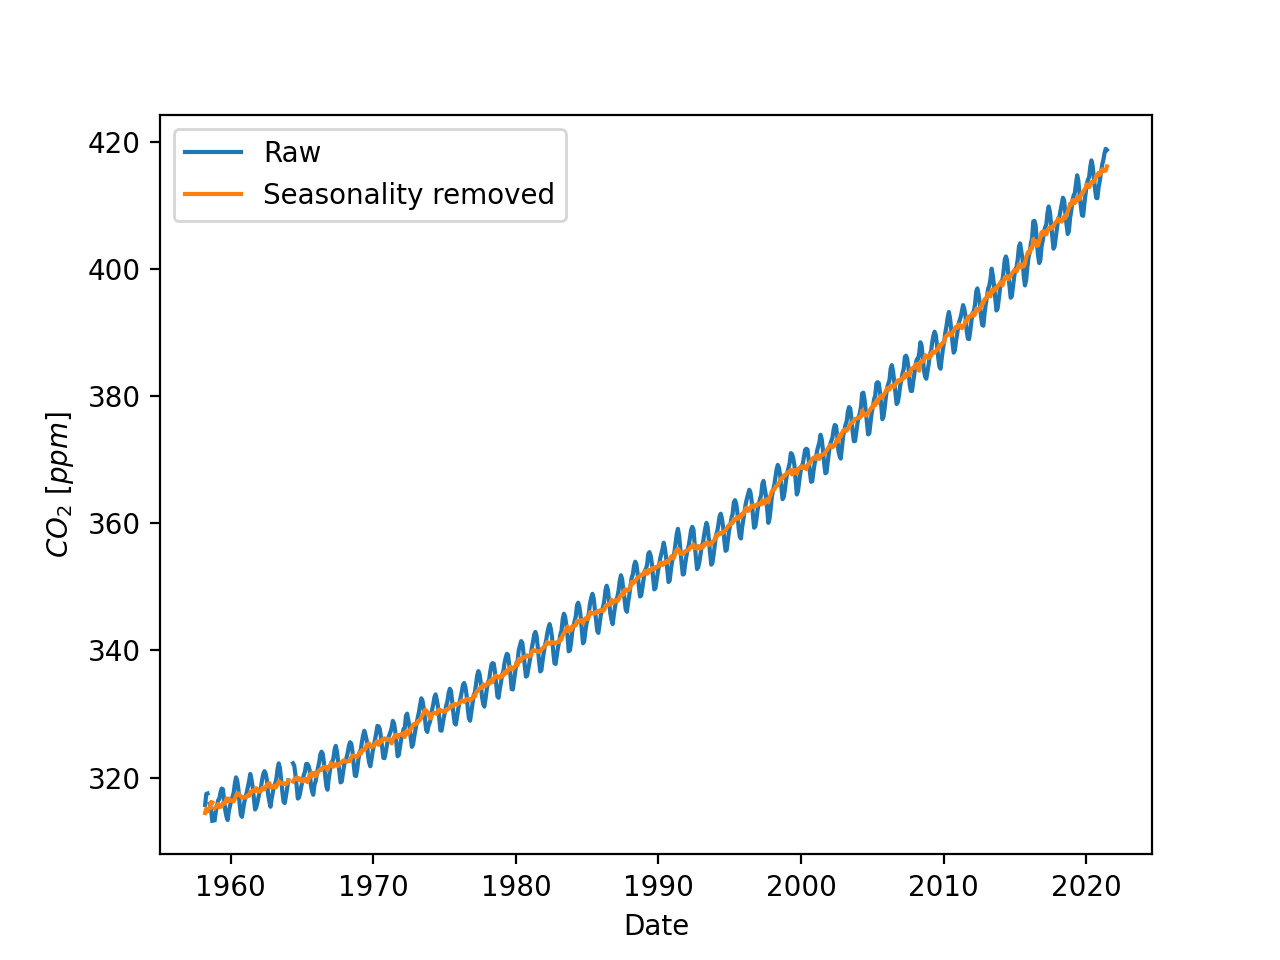

Text(0, 0.5, '$CO_2\\ [ppm]$')

In [146]:
fig, ax = plt.subplots()
ax.plot(moana['date'], moana['CO2'], label='Raw')
ax.plot(moana['date'], moana['CO2_adj'], label='Seasonality removed')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('$CO_2\ [ppm]$')

Note the use of `np.where` above to replace -99.99 by np.NaN.  This is usually the easiest way to fill in values, but there are other ways to do this


In [161]:
data = np.genfromtxt('../data/moana_monthly.csv', delimiter=',', skip_header=57)
moana = {'year': data[:, 0], 'month': data[:, 1], 'CO2': data[:, 4], 'CO2_adj': data[:, 5]}
print((moana['CO2']<-99)[:20])
moana['CO2'][moana['CO2']<-99] = np.NaN
print(moana['CO2'][:20])

[   nan    nan 315.7  317.45 317.51    nan 315.86 314.93 313.21    nan
 313.33 314.67 315.58 316.49 316.65 317.72 318.29 318.15 316.54 314.8 ]
[False False False False False False False False False False False False
 False False False False False False False False]
[   nan    nan 315.7  317.45 317.51    nan 315.86 314.93 313.21    nan
 313.33 314.67 315.58 316.49 316.65 317.72 318.29 318.15 316.54 314.8 ]


**Note** As an asside, note that I had to re-load `data` above.  That is because `moana['CO2']` is a _pointer_ to `data[:, 4]`.  If I didn't want to modify `data` in-place, we would have had to `copy` the data rather than just point at it. 

## strings

A quick note about string formatting.  This has evolved significantly over the last few years, but for modern python the following are the same.  The second formalism is relatively new and called an "f-string" and is typically prefered.


In [166]:
a = 1.234
st = '{}'.format(a)
print(st)
st = f'{a}'
print(st)

1.234
1.234


In [170]:
# you can use C-style format specifiers:
print(f'{a:1.1f}')
print(f'{a:1.5f}')
print(f'{a:1.2e}')

1.2
1.23400
1.23e+00


In [171]:
# Note you can concatenate strings:
st + 'boo'

'1.234boo'

# Reading a matlab file and multiple subplots

Now lets read a matlab file, since if you are ex-Matlab users you may still have some around.  This typically goes fine - Matlab's file format is actually an open format called HDF5, but the resulting structure is kind of ugly (ahem, in fact I don't understand it at all, and don't care because I can usually wrestle what I want out of it).  

Here we will look at some CTD data, and we will want to look at the different fields on different subplots:

In [200]:
import scipy.io as sio

data = sio.loadmat('../data/20200125_S4.mat')
print(data.keys())
print(data['__globals__'])
print(data['ctd'][0][0])

dict_keys(['__header__', '__version__', '__globals__', 'ctd'])
[]
(array(['* Sea-Bird SBE19plus Data File:\n\n* FileName = C:\\Users\\Ocean Optics\\Desktop\\CTD_Archive\\2020\\202001\\20200124_S4.hex\n\n* Software Version 1.59\n\n* Temperature SN =  4252\n\n* Conductivity SN =  4252\n\n* System UpLoad Time = Jan 25 2020 09:43:29\n\n** Ship:Strickland\n\n** Cruise ID:202001\n\n** Station ID:S4\n\n** Latitude (dd mm.mmm):48 38.481\n\n** Longitude (ddd mm.mmm):123 30.168\n\n** Date & Time (local): (eg 21 Sep 2018 13:21)9:37\n\n* ds\n\n* SeacatPlus V 1.6a  SERIAL NO. 4252    25 Jan 2020  09:49:24\n\n* vbatt = 13.3, vlith =  8.2, ioper =  61.9 ma, ipump =  67.1 ma, \n\n* iext01 =  39.2 ma\n\n* iext23 =  77.1 ma\n\n* \n\n* status = not logging\n\n* number of scans to average = 1\n\n* samples = 7632, free = 485815, casts = 5\n\n* mode = profile, minimum cond freq = 3148, pump delay = 40 sec\n\n* autorun = no, ignore magnetic switch = no\n\n* battery type = alkaline, battery cutoff =  7.3 volt

This data was stored in a structure, and unfortunately `sio.loadmat` is not up to the task of dealing that structure out.  But its also clear that the data is all there, we just need to do a bit of archaelogy (or I could cheat and look in Matlab or Octave).

<IPython.core.display.Javascript object>


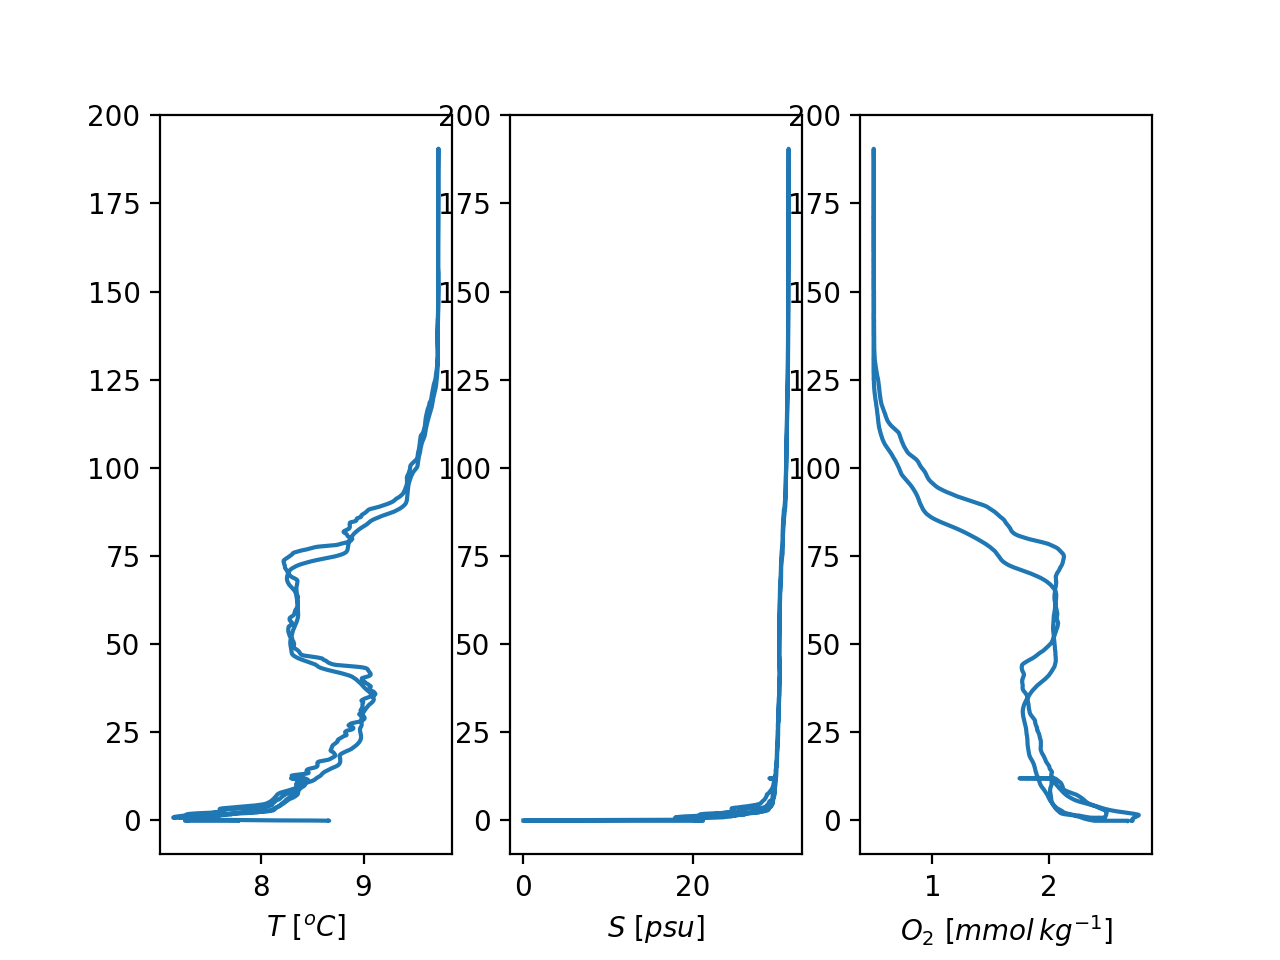

In [246]:
ctd = {}
ctd['temp'] = data['ctd'][0][0][2][0]
ctd['cond'] = data['ctd'][0][0][3][0]
ctd['p'] = data['ctd'][0][0][4][0]
ctd['O2'] = data['ctd'][0][0][5][0]
ctd['sal'] = data['ctd'][0][0][13][0]

fig, axs = plt.subplots(1, 3)
todos = ['temp', 'sal', 'O2']
labels = ['$T\ [^oC]$', '$S\ [psu]$', '$O_2\ [mmol\,kg^{-1}]$']
for nn, todo in enumerate(todos):
    ax = axs[nn]
    ax.plot(ctd[todo], ctd['p'])
    ax.set_xlabel(labels[nn])


lets fix some plotting niceties

<IPython.core.display.Javascript object>


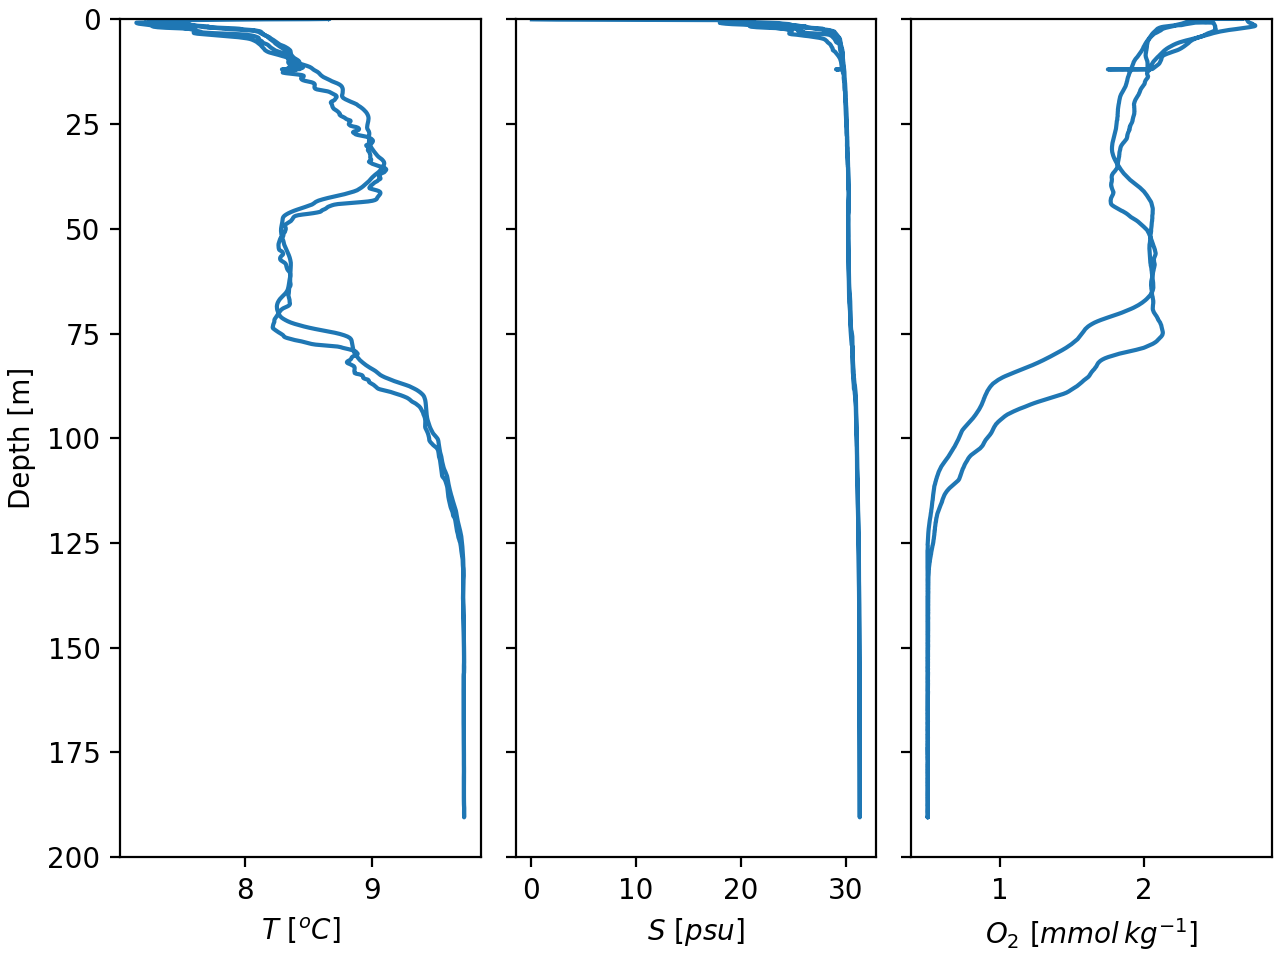

Text(0, 0.5, 'Depth [m]')

In [250]:
fig, axs = plt.subplots(1, 3, sharey=True, constrained_layout=True)
todos = ['temp', 'sal', 'O2']
labels = ['$T\ [^oC]$', '$S\ [psu]$', '$O_2\ [mmol\,kg^{-1}]$']
for nn, todo in enumerate(todos):
    ax = axs[nn]
    ax.plot(ctd[todo], ctd['p'])
    ax.set_xlabel(labels[nn])
    ax.set_ylim([200, 0])
axs[0].set_ylabel('Depth [m]')

Note the double line, that is because we are looking at a down-cast followed by an up-cast.  We can see this easily by looking at any of the variables as a timeseries:

<IPython.core.display.Javascript object>


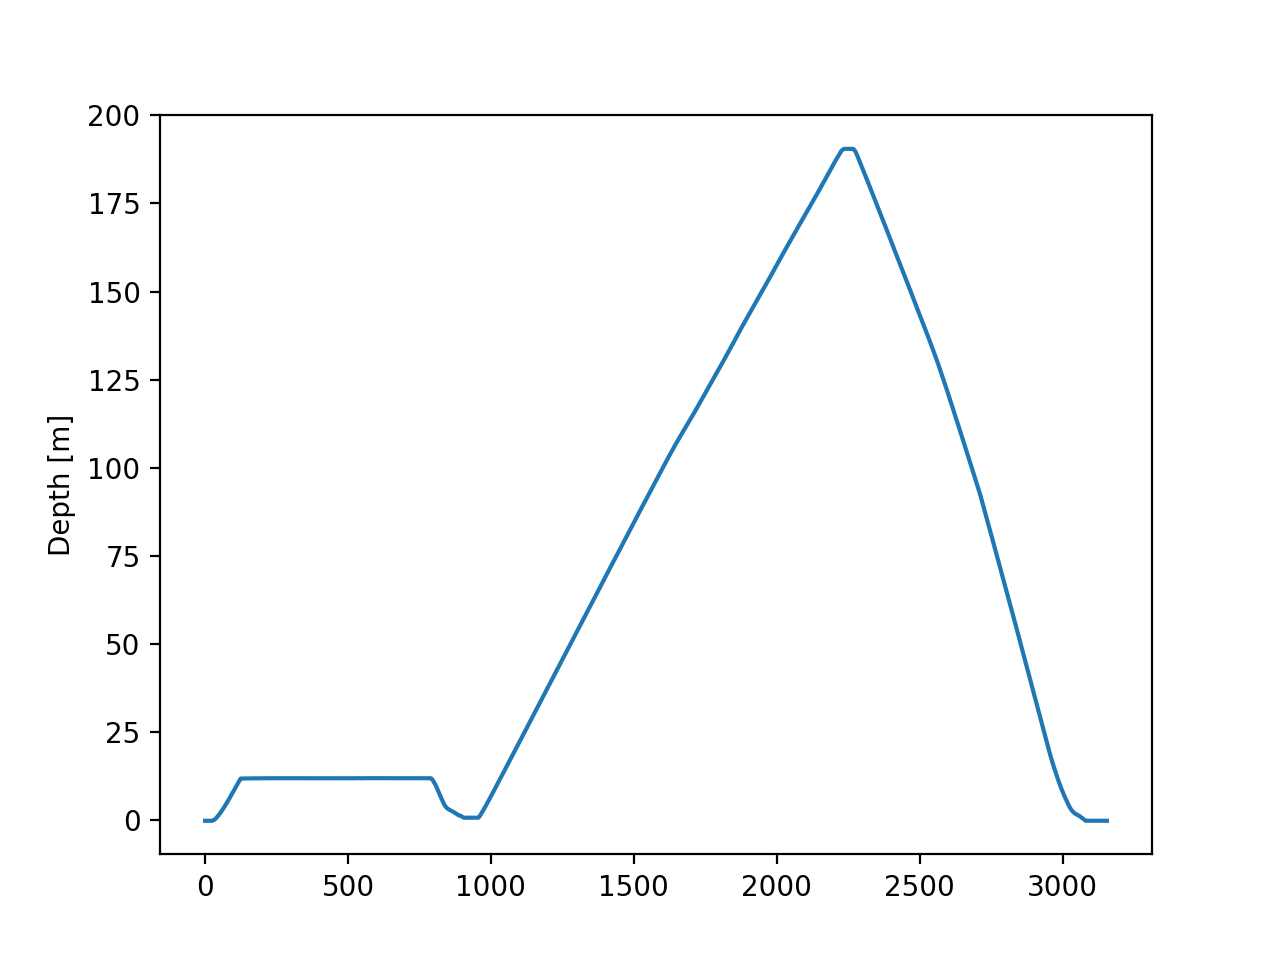

Text(0, 0.5, 'Depth [m]')

In [252]:
fig, ax = plt.subplots()
ax.plot(ctd['p'])
ax.set_ylabel('Depth [m]')

The easiest thing to do here is pick the downcast by hand.  If you want to do this automatically for many CTD casts, you should do something more sophisticated, but...

In interactive mode we can use the mouse to figure out the indices, about 953 to 2248.

<IPython.core.display.Javascript object>


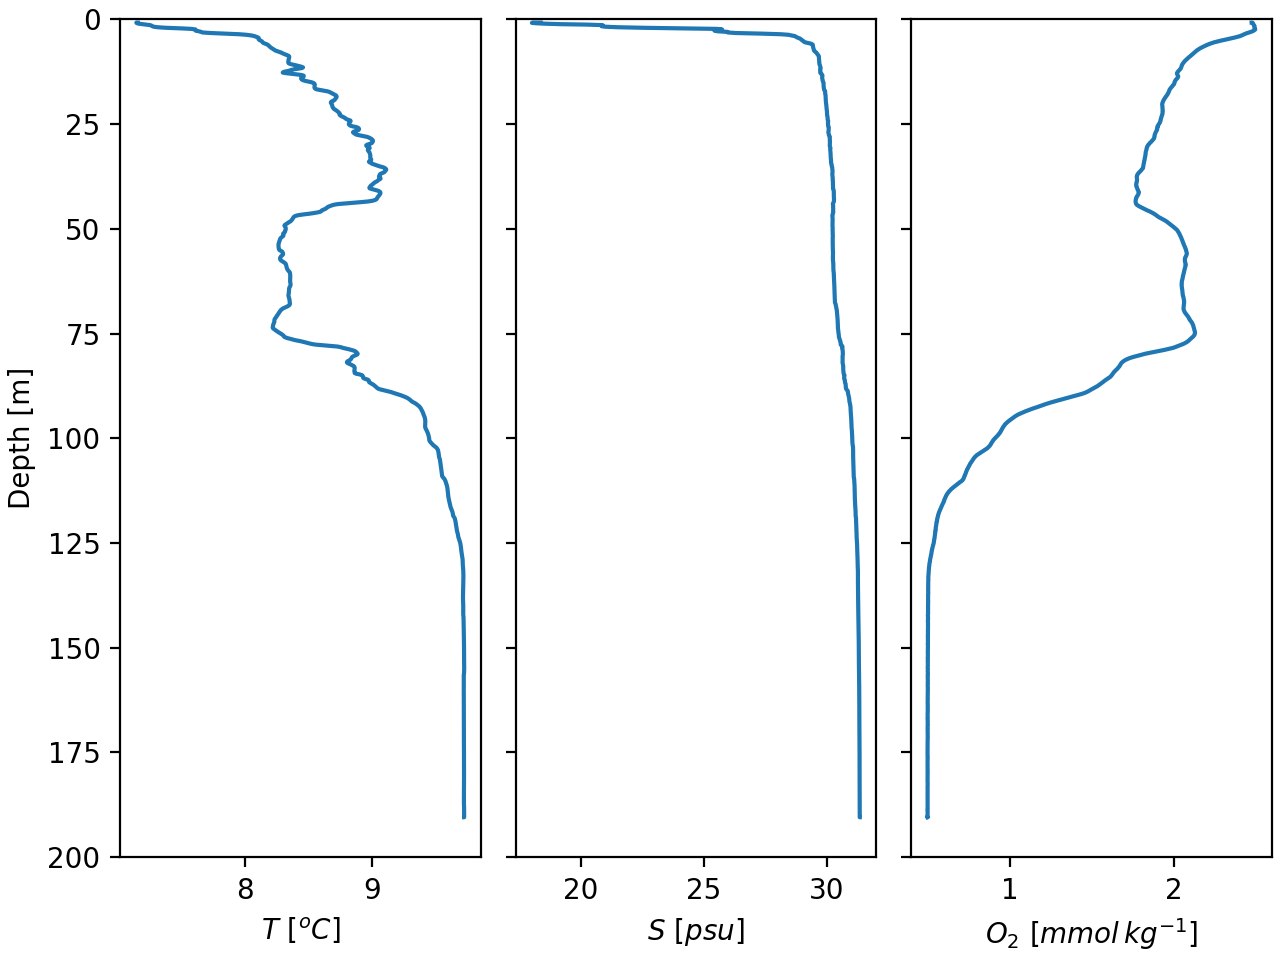

Text(0, 0.5, 'Depth [m]')

In [253]:
fig, axs = plt.subplots(1, 3, sharey=True, constrained_layout=True)
todos = ['temp', 'sal', 'O2']
labels = ['$T\ [^oC]$', '$S\ [psu]$', '$O_2\ [mmol\,kg^{-1}]$']
ind = range(953, 2248)
for nn, todo in enumerate(todos):
    ax = axs[nn]
    ax.plot(ctd[todo][ind], ctd['p'][ind])
    ax.set_xlabel(labels[nn])
    ax.set_ylim([200, 0])
axs[0].set_ylabel('Depth [m]')

# Reading a netcdf file (GISTemp)

So far we have only dealt with numpy arrays, which as we have seen in the Matlab example do not have much metadata.  Metadata is hard, but NetCDF has been around for a while and is generally a nice organized way to look at datasets.  The [xarray](https://xarray.pydata.org) package is organized around netcdf files, and is a great way of keeping your data organized on disk as well.  When used with [dask](https://dask.org), it can also do things in a parallel manner, and is very scalable to very large data sets that could never fit in memory.

Here lets look at the 2x2 degree surface temperature anomalies (from https://psl.noaa.gov/data/gridded/data.gistemp.html)



In [2]:
import xarray as xr


with xr.open_dataset('../data/air.2x2.250.mon.anom.comb.new.nc') as ds:
    # note the Attributes for the data set
    print(ds)
    # note the Attributes for the data variable 'air'
    print(ds['air'])

<xarray.Dataset>
Dimensions:  (lat: 90, lon: 180, time: 1697)
Coordinates:
  * lat      (lat) float32 89.0 87.0 85.0 83.0 81.0 ... -83.0 -85.0 -87.0 -89.0
  * lon      (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * time     (time) datetime64[ns] 1880-01-01 1880-02-01 ... 2021-05-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    title:          GISS Surface Temperature Analysis (GISTEMP): 250km smooth...
    platform:       Analysis
    Source:         http://data.giss.nasa.gov/gistemp/ source and http://data...
    Documentation:  http://www.esrl.noaa.gov/psd/data/gridded/data.gistemp.html
    Conventions:    COARDS
    history:        created at PSD Jun 2009 by CAS. Converted to chunked, def...
    dataset_title:  GISS Surface Temperature Analysis
    comments:       This is the 1200km smoothed combined land,ocean version o...
    References:     https://www.psl.noaa.gov/data/gridded/data.gistemp.html
    update_date:    07/2021
    

<IPython.core.display.Javascript object>


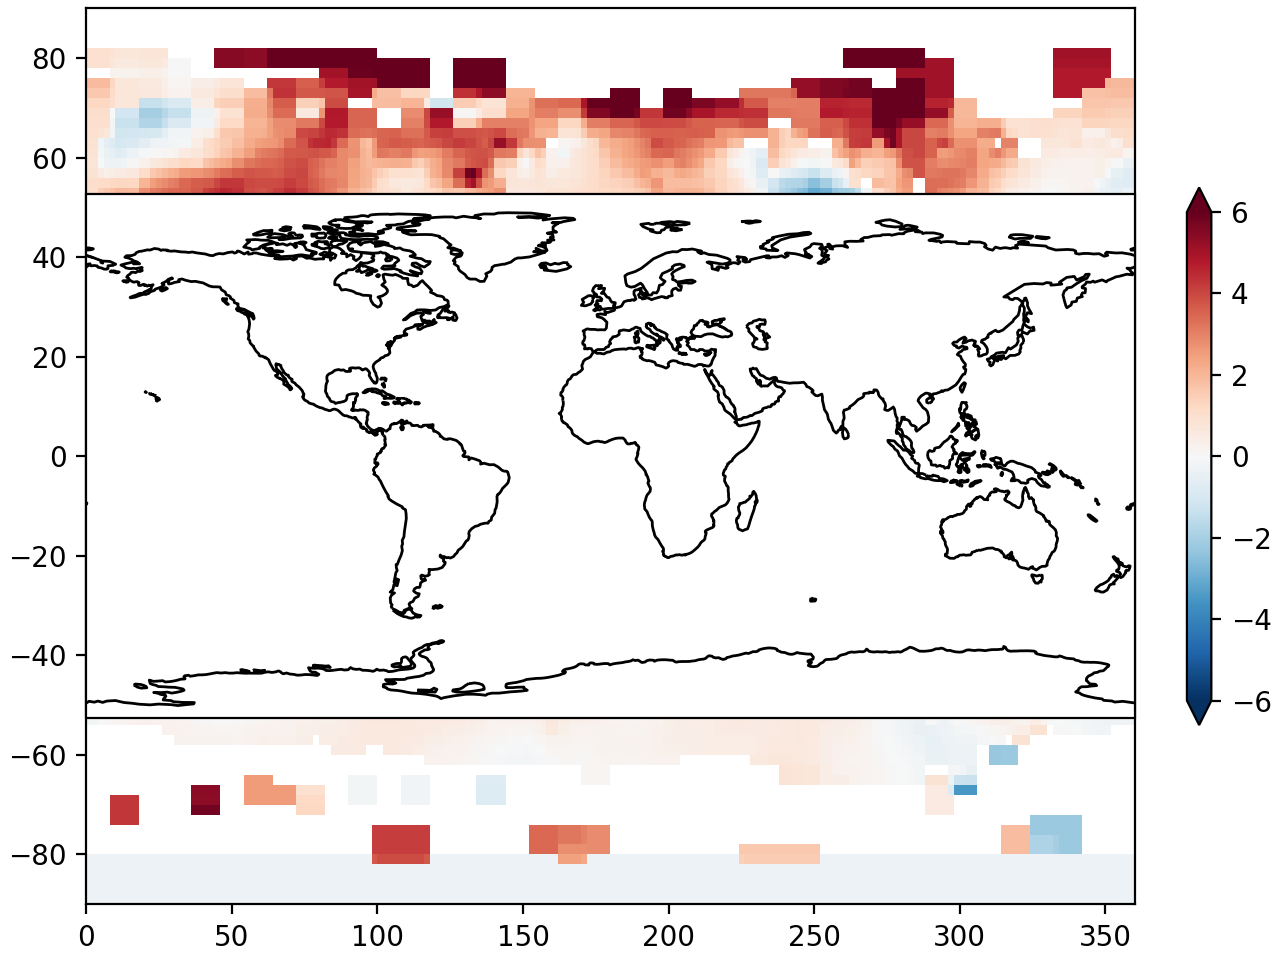

In [3]:
fig, ax = plt.subplots(constrained_layout=True)
pc = ax.pcolormesh(ds['lon'], ds['lat'], ds['air'][-20, :, :], 
              shading='auto', cmap='RdBu_r', vmin=-6, vmax=6)
fig.colorbar(pc, extend='both', shrink=0.6)

<IPython.core.display.Javascript object>


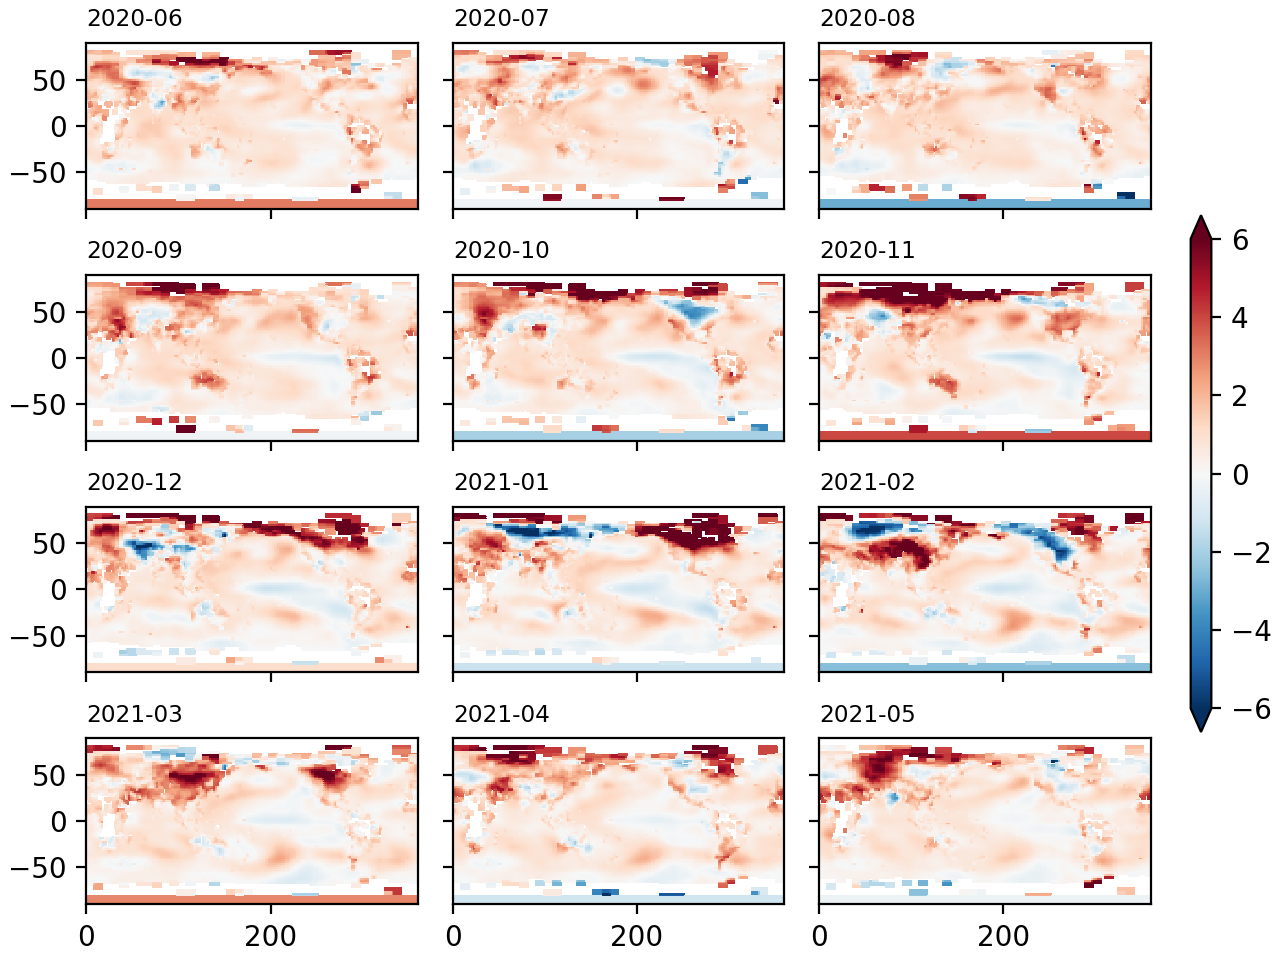

In [284]:
fig, axs = plt.subplots(4, 3, constrained_layout=True, sharex=True, sharey=True)
for n in range(12):
    ax = axs.flat[n]
    pc = ax.pcolormesh(ds['lon'], ds['lat'], ds['air'][-12+n, :, :], 
              shading='auto', cmap='RdBu_r', vmin=-6, vmax=6)
    ax.set_title(f"{ds['time'][-12 + n].values}"[:7], fontsize='small', loc='left')
fig.colorbar(pc, ax=axs, extend='both', shrink=0.6)

## Manipulating xarray datasets

We can easily manipulate these data sets and create new variables.  Note in this case the Co-ordinates are automatically assigned:

In [297]:
ds['Ttimes2'] = ds['air'] * 2
print(ds)

<xarray.Dataset>
Dimensions:    (lat: 90, lon: 180, time: 1697)
Coordinates:
  * lat        (lat) float64 89.0 87.0 85.0 83.0 ... -83.0 -85.0 -87.0 -89.0
  * lon        (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 353.0 355.0 357.0 359.0
  * time       (time) datetime64[ns] 1880-01-01 1880-02-01 ... 2021-05-01
Data variables:
    air        (time, lat, lon) float32 nan nan nan ... -0.3139 -0.3139 -0.3139
    Ttimes2    (time, lat, lon) float32 nan nan nan ... -0.6279 -0.6279 -0.6279
    specialT   (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    specialT2  (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    title:          GISS Surface Temperature Analysis (GISTEMP): 250km smooth...
    platform:       Analysis
    Source:         http://data.giss.nasa.gov/gistemp/ source and http://data...
    Documentation:  http://www.esrl.noaa.gov/psd/data/gridded/data.gistemp.html
    Conventions:    COARDS
    history:        created at PSD Jun 2009 by CAS. C

In [298]:
ds['specialT'] = ds['air'][20, :, :]
print(ds)
# note how the time co-ordinate is dropped fron the "specialT" variable.

<xarray.Dataset>
Dimensions:    (lat: 90, lon: 180, time: 1697)
Coordinates:
  * lat        (lat) float64 89.0 87.0 85.0 83.0 ... -83.0 -85.0 -87.0 -89.0
  * lon        (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 353.0 355.0 357.0 359.0
  * time       (time) datetime64[ns] 1880-01-01 1880-02-01 ... 2021-05-01
Data variables:
    air        (time, lat, lon) float32 nan nan nan ... -0.3139 -0.3139 -0.3139
    Ttimes2    (time, lat, lon) float32 nan nan nan ... -0.6279 -0.6279 -0.6279
    specialT   (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    specialT2  (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    title:          GISS Surface Temperature Analysis (GISTEMP): 250km smooth...
    platform:       Analysis
    Source:         http://data.giss.nasa.gov/gistemp/ source and http://data...
    Documentation:  http://www.esrl.noaa.gov/psd/data/gridded/data.gistemp.html
    Conventions:    COARDS
    history:        created at PSD Jun 2009 by CAS. C

In [299]:
# if you try to jam something in that doesn't fit it gets confused 
# because your new variable does not have the size of the given dimensions
ds['specialT2'] = np.random.randn(30, 30)


MissingDimensionsError: cannot set variable 'specialT2' with 2-dimensional data without explicit dimension names. Pass a tuple of (dims, data) instead.

In [301]:
# if we want to add a data type not created from another we need to say what its 
# dimensions are:
ds['specialT2'] = (('lat', 'lon'), np.random.randn(90, 180))
print(ds)

<xarray.Dataset>
Dimensions:    (lat: 90, lon: 180, time: 1697)
Coordinates:
  * lat        (lat) float64 89.0 87.0 85.0 83.0 ... -83.0 -85.0 -87.0 -89.0
  * lon        (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 353.0 355.0 357.0 359.0
  * time       (time) datetime64[ns] 1880-01-01 1880-02-01 ... 2021-05-01
Data variables:
    air        (time, lat, lon) float32 nan nan nan ... -0.3139 -0.3139 -0.3139
    Ttimes2    (time, lat, lon) float32 nan nan nan ... -0.6279 -0.6279 -0.6279
    specialT   (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    specialT2  (lat, lon) float64 0.418 -0.7775 0.2339 ... -0.05406 -1.698
Attributes:
    title:          GISS Surface Temperature Analysis (GISTEMP): 250km smooth...
    platform:       Analysis
    Source:         http://data.giss.nasa.gov/gistemp/ source and http://data...
    Documentation:  http://www.esrl.noaa.gov/psd/data/gridded/data.gistemp.html
    Conventions:    COARDS
    history:        created at PSD Jun 2009 by CAS. Conv

## plotting maps!

The plots above are just lon-vs-lat, with no aspect ratio taken into account.  Maps are always hard, requiring a projection, and the most popular library is [cartopy](https://scitools.org.uk/cartopy/docs/latest/).  (Note basemap used to be popular, but it is discontinued).  

In [4]:
import cartopy

ooops, unless you were very prepared, cartopy is _not_ installed by default.  To install, we go to the command line and issue `conda install cartopy`.  We will have to restart our kernel to get this to take effect...

<IPython.core.display.Javascript object>


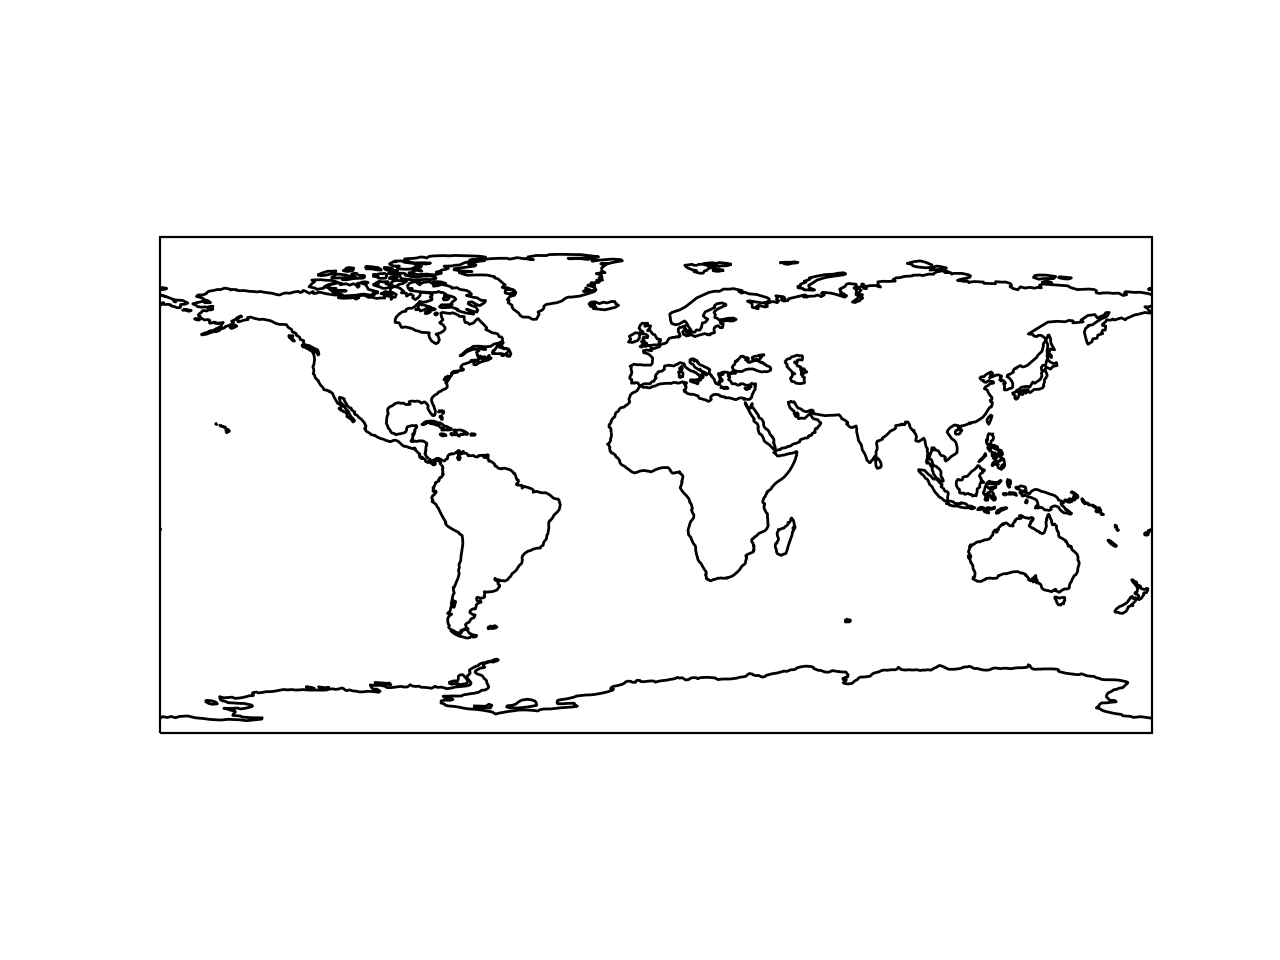

In [13]:
import cartopy.crs as ccrs
fig = plt.figure()
ax = fig.add_subplot(projection=ccrs.PlateCarree())
ax.coastlines()


<IPython.core.display.Javascript object>


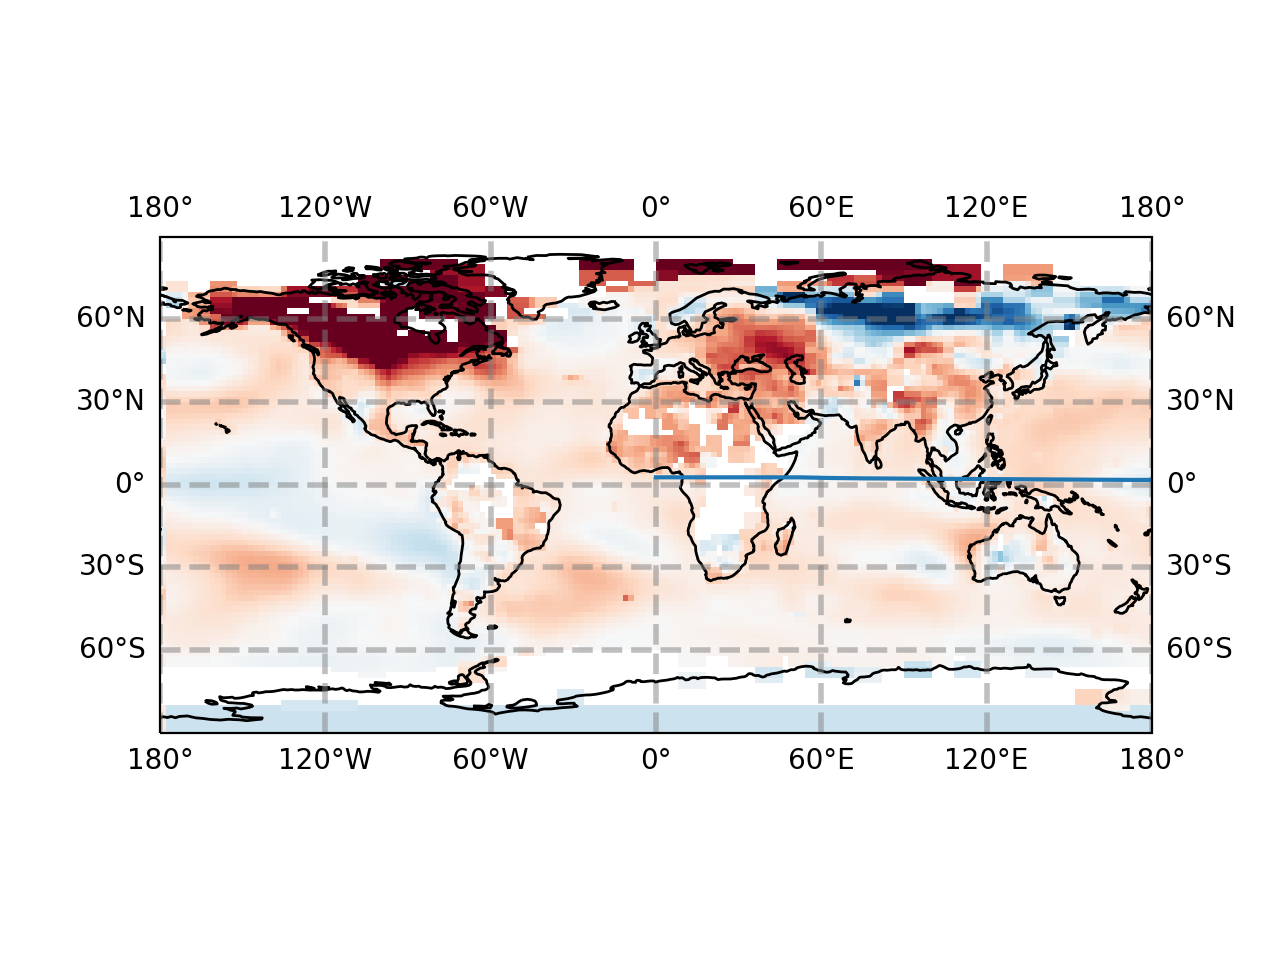

In [17]:
import cartopy.crs as ccrs
fig = plt.figure()
ax = fig.add_subplot(projection=ccrs.PlateCarree())
ax.coastlines()

ax.pcolormesh(ds.lon, ds.lat, ds.air[-5, :, :], 
              cmap='RdBu_r', vmin=-6, vmax=6)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
              linewidth=2, color='gray', alpha=0.5, linestyle='--')

# outputing data

Of course want to save our data somehow after we have made it or manipulated it.  There are lots of ways to do this, the best probably being saving as text or as netcdf.  Note that `numpy` has a `np.save` command, but it is not likely to be readble by anyone else.  

## saving as text:

Numpy has a simple `np.savetxt` which should be adequate for simple 2-D arrays.  lets take the CTD data from above and save as a csv file:

In [47]:
import scipy.io as sio

data = sio.loadmat('../data/20200125_S4.mat')
ctd = {}
ctd['temp'] = data['ctd'][0][0][2][0]
ctd['cond'] = data['ctd'][0][0][3][0]
ctd['p'] = data['ctd'][0][0][4][0]
ctd['O2'] = data['ctd'][0][0][5][0]
ctd['sal'] = data['ctd'][0][0][13][0]

out = np.vstack((ctd['temp'], ctd['cond'], ctd['p'], ctd['O2'], ctd['sal'])).T
np.savetxt('test.csv', out, delimiter=',', header="CTD cast\nTemp, Cond, P, O2, Sal")

In [48]:
!ls test.csv

test.csv


## Saving as netcdf

This is a little more involved, because we need to define the dimensions and co-ordinates.  However in this case we don't really have co-orindates (or it could be time):

In [2]:
import xarray as xr
ds = xr.Dataset({'temp': (('sample',), ctd['temp'], {'units':'degC', 'longname': 'water_temperature'}),
            'cond': (('sample',), ctd['cond'], {'units':'Simmens per m', 'longname': 'water_conductivity'}),
            'sal': (('sample',), ctd['sal'], {'units':'practical salinity units', 'longname': 'water_salinity'}),
            'p': (('sample',), ctd['p']),
            'O2': (('sample',), ctd['O2']),
           }, 
               attrs={'type': 'CTD cast!'})
ds.to_netcdf('testout.nc')

NameError: name 'ctd' is not defined

In [69]:
with xr.open_dataset('testout.nc') as ds:
    print(ds)
    print(ds.temp)

<xarray.Dataset>
Dimensions:  (sample: 3156)
Dimensions without coordinates: sample
Data variables:
    temp     (sample) float64 ...
    cond     (sample) float64 ...
    sal      (sample) float64 ...
    p        (sample) float64 ...
    O2       (sample) float64 ...
Attributes:
    type:     CTD cast!
<xarray.DataArray 'temp' (sample: 3156)>
array([8.664915, 8.664748, 8.664748, ..., 7.771535, 7.773766, 7.776921])
Dimensions without coordinates: sample
Attributes:
    units:     degC
    longname:  water_temperature


# Appendix: Other packages

- [SciPy](https://www.scipy.org) is kind of like "toolboxes" in Matlab; It builds heavily on numpy and many of the routines you may want to use (optimization, advanced linear algebra, gridding routines, etc). 
- [Panadas](https://pandas.pydata.org): meant to bring spreadsheet-like functionality to python.  _Many_ examples on the web use pandas "dataframes".  I personally think _most_ geoscience applications are better served by using [Xarray](https://xarray.pydata.org), which really is pandas for multi-dimensions. 


# Appendix: trim the netcdf file for github

The next cdf file was too big for github, so just look at last 50 years...

In [11]:
with xr.open_dataset('../data/air.2x2.250.mon.anom.comb.nc') as ds:
    #print(ds)
    ds.to_netcdf('../data/air.2x2.250.mon.anom.comb.new.nc')